In [1]:
import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
import networkx as nx

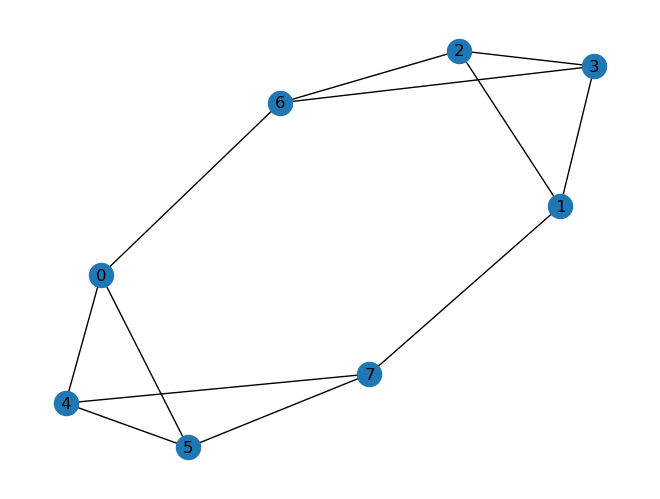

In [2]:
qubits = 8
graph = nx.random_regular_graph(3, qubits, seed=722)

nx.draw(graph, with_labels=True)
plt.show()

In [3]:
cost_h, mixer_h = qaoa.maxcut(graph)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-6.0) [I1]
+ (0.5) [Z1 Z2]
+ (0.5) [Z1 Z7]
+ (0.5) [Z1 Z3]
+ (0.5) [Z2 Z3]
+ (0.5) [Z2 Z6]
+ (0.5) [Z0 Z4]
+ (0.5) [Z0 Z6]
+ (0.5) [Z0 Z5]
+ (0.5) [Z4 Z5]
+ (0.5) [Z4 Z7]
+ (0.5) [Z5 Z7]
+ (0.5) [Z6 Z3]
Mixer Hamiltonian   (1) [X1]
+ (1) [X2]
+ (1) [X0]
+ (1) [X4]
+ (1) [X5]
+ (1) [X7]
+ (1) [X6]
+ (1) [X3]


In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [5]:
wires = range(qubits)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [6]:
dev = qml.device("qiskit.aer", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [7]:
params = np.array([[0.5] * depth, [0.5] * depth], requires_grad=True)

In [8]:
cost_function(params)

array(-3.31835938)

In [9]:
QuantumCircuit.count_ops(dev._circuit)

OrderedDict([('cx', 48), ('h', 40), ('rz', 40), ('measure', 8)])

In [10]:
# print the number of total gates

print("Total number of gates: ", sum(QuantumCircuit.count_ops(dev._circuit).values()))

Total number of gates:  136


In [11]:
# print the number of two qubit gates, i.e. cx gates + rz gates

print("Number of two qubit gates: ", QuantumCircuit.count_ops(dev._circuit)['cx'] + QuantumCircuit.count_ops(dev._circuit)['rz'])

Number of two qubit gates:  88


In [12]:
dev._circuit.qasm(formatted=True, filename="./raw_qasm/qaoa_n{}_from_python.qasm".format(qubits))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[8];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
cx q[2],q[1];
rz(0.5) q[1];
cx q[2],q[1];
cx q[7],q[1];
rz(0.5) q[1];
cx q[7],q[1];
cx q[3],q[1];
rz(0.5) q[1];
cx q[3],q[1];
cx q[3],q[2];
rz(0.5) q[2];
cx q[3],q[2];
cx q[6],q[2];
rz(0.5) q[2];
cx q[6],q[2];
cx q[4],q[0];
rz(0.5) q[0];
cx q[4],q[0];
cx q[6],q[0];
rz(0.5) q[0];
cx q[6],q[0];
cx q[5],q[0];
rz(0.5) q[0];
cx q[5],q[0];
cx q[5],q[4];
rz(0.5) q[4];
cx q[5],q[4];
cx q[7],q[4];
rz(0.5) q[4];
cx q[7],q[4];
cx q[7],q[5];
rz(0.5) q[5];
cx q[7],q[5];
cx q[3],q[6];
rz(0.5) q[6];
cx q[3],q[6];
h q[1];
rz(1.0) q[1];
h q[1];
h q[2];
rz(1.0) q[2];
h q[2];
h q[0];
rz(1.0) q[0];
h q[0];
h q[4];
rz(1.0) q[4];
h q[4];
h q[5];
rz(1.0) q[5];
h q[5];
h q[7];
rz(1.0) q[7];
h q[7];
h q[6];
rz(1.0) q[6];
h q[6];
h q[3];
rz(1.0) q[3];
h q[3];
cx q[2],q[1];
rz(0.5) q[1];
cx q[2],q[1];
cx q[7],q[1];
rz(0.5) q[1];
cx q[7],q[1];
cx q[3],q[1];
rz(0.5) q[1];
cx q[3],q[1];
cx q[3],